In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

In [17]:
ds = pd.read_csv('spotify-2023.csv', encoding='latin-1')
ds.keys()

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [18]:
ds.drop('track_name', inplace = True, axis = 1)
ds.drop('artist(s)_name', inplace = True, axis = 1)
LE = LabelEncoder()
ds['key'] = LE.fit_transform(ds['key'])
ds['mode'] = LE.fit_transform(ds['mode'])
ds['streams'] = LE.fit_transform(ds['streams'])
ds['in_deezer_playlists'] = LE.fit_transform(ds['in_deezer_playlists'])
ds['in_shazam_charts'] = LE.fit_transform(ds['in_shazam_charts'])
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          953 non-null    int64
 1   released_year         953 non-null    int64
 2   released_month        953 non-null    int64
 3   released_day          953 non-null    int64
 4   in_spotify_playlists  953 non-null    int64
 5   in_spotify_charts     953 non-null    int64
 6   streams               953 non-null    int32
 7   in_apple_playlists    953 non-null    int64
 8   in_apple_charts       953 non-null    int64
 9   in_deezer_playlists   953 non-null    int32
 10  in_deezer_charts      953 non-null    int64
 11  in_shazam_charts      953 non-null    int32
 12  bpm                   953 non-null    int64
 13  key                   953 non-null    int32
 14  mode                  953 non-null    int32
 15  danceability_%        953 non-null    int64
 16  valence_

In [19]:
scaler = MinMaxScaler()
names = ds.columns
ds_scaler = scaler.fit_transform(ds)
ds = pd.DataFrame(ds_scaler, columns=names)

ds.loc[ds["in_spotify_charts"] < 0.1, "in_spotify_charts"] = 1 #very popular 1st class
ds.loc[ds["in_spotify_charts"] >= 0.1, "in_spotify_charts"] = 0 #not that popular 2nd class
ds.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.142857,1.000000,0.545455,0.433333,0.009874,0.0,0.164557,0.063988,0.956364,0.625360,...,0.425532,0.181818,0.0,0.780822,0.913978,0.840909,0.319588,0.000000,0.053191,0.032258
1,0.000000,1.000000,0.181818,0.733333,0.027295,0.0,0.131857,0.071429,0.458182,0.755043,...,0.191489,0.272727,0.0,0.657534,0.612903,0.738636,0.072165,0.000000,0.074468,0.032258
2,0.000000,1.000000,0.454545,0.966667,0.025838,0.0,0.159283,0.139881,0.752727,0.971182,...,0.517730,0.636364,0.0,0.383562,0.301075,0.500000,0.175258,0.000000,0.297872,0.064516
3,0.000000,0.956989,0.636364,0.733333,0.148051,0.0,0.911392,0.172619,0.752727,0.144092,...,0.744681,0.000000,0.0,0.438356,0.580645,0.715909,0.113402,0.000000,0.085106,0.209677
4,0.000000,1.000000,0.363636,0.566667,0.058676,0.0,0.526371,0.125000,0.483636,0.951009,...,0.560284,0.000000,1.0,0.575342,0.204301,0.806818,0.144330,0.692308,0.085106,0.064516


In [20]:
X = ds.drop('in_spotify_charts', axis=1);
y = ds['in_spotify_charts'];

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [21]:
fully_con_feed_forward_net = Sequential(name = "FFNN")

fully_con_feed_forward_net.add(Dense(20, input_shape=(21,), activation = 'relu'))
fully_con_feed_forward_net.add(Dense(50, activation = 'relu'))
fully_con_feed_forward_net.add(Dense(2, activation = 'sigmoid')) #changed activation from "relu" to "sigmoid"

fully_con_feed_forward_net.compile(loss="binary_crossentropy", metrics = ['accuracy'], optimizer = 'adam')
res = fully_con_feed_forward_net.fit(X_train, y_train, epochs = 100)



Epoch 1/100


24/24 [==============================] - 1s 1ms/step - loss: 0.4462 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1869 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 8.6500e-04 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 6.2615e-04 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 4.6274e-04 - accuracy: 

For training:
24/24 [==============================] - 0s 1ms/step - loss: 7.7559e-07 - accuracy: 1.0000
Losses: 7.755859883218363e-07
Accuracy: 1.0

For validation:
6/6 [==============================] - 0s 1ms/step - loss: 1.0982e-06 - accuracy: 1.0000
Losses: 1.0981699460899108e-06
Accuracy: 1.0


In [23]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import cv2
from PIL import Image

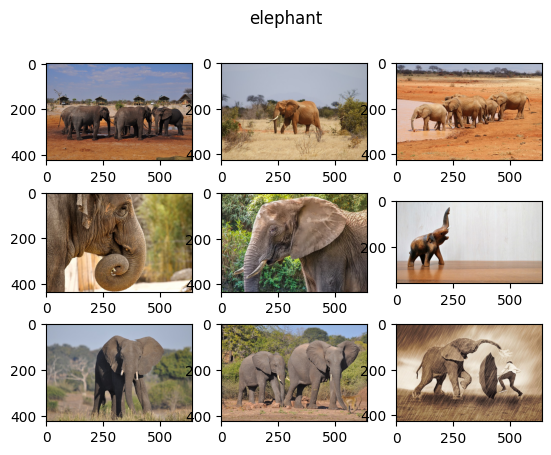

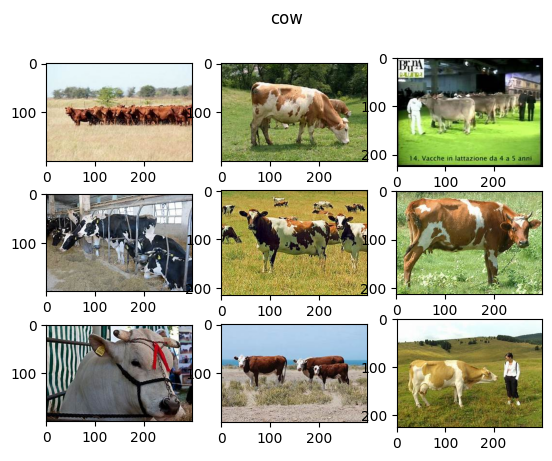

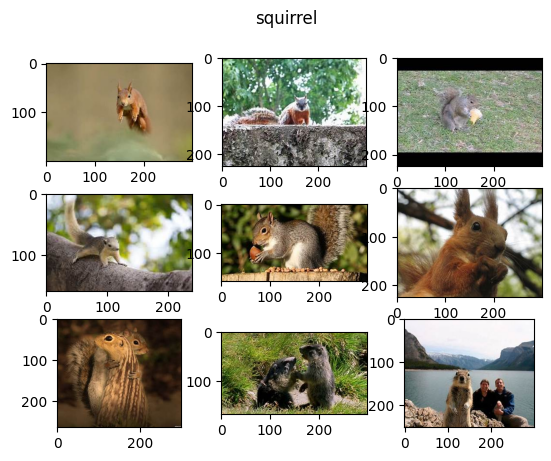

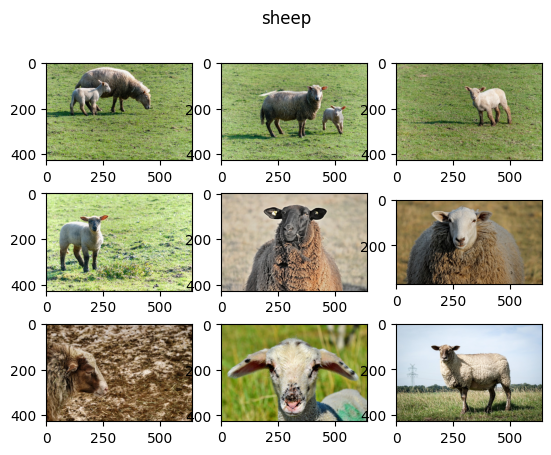

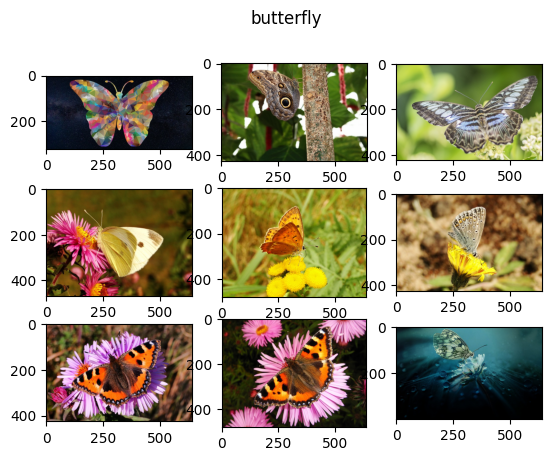

In [24]:
elephant_loc = "./train/elephant"
cow_loc = './train/cow'
squirrel_loc = './train/squirrel'
sheep_loc = './train/sheep'
butterfly_loc = './train/butterfly'
test_samples = './test'

path = "./train/"
categories = ["elephant", "cow", "squirrel", "sheep", "butterfly"]
for c in categories:
    figure, _ = plt.subplots(3, 3)
    figure.suptitle(c)
    for k, v in enumerate(os.listdir(path + c)[:9]):
        image = plt.imread(path + c + '/' + v)
        plt.subplot(3, 3, k+1)
        plt.imshow(image)
    plt.show()

In [25]:
num_skipped = 0
for folder_name in ("elephant", "cow", "squirrel", "sheep", "butterfly"):
    folder_path = os.path.join("./train/", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 0 images.


In [26]:
X = []
y = []
paths = []
path = "./train/"

for k, c in enumerate(categories):
    for f in os.listdir(path + c):
        paths.append([path + c + '/' + f, k])

for path in paths:
    image = cv2.imread(path[0])
    image = cv2.resize(image, (128, 128))
    X.append(image)
    
    label = path[1]
    y.append(label)
    
X = np.array(X, dtype="float") / 255
y = np.array(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
print(X_train.shape)
print(X_test.shape)

(7194, 128, 128, 3)
(800, 128, 128, 3)


In [28]:
alpha = 0.02

model = keras.Sequential()

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(X_train.shape[1:])))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(512))
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Dense(5, activation="softmax")) #changed units from 1o to 5 to represent 5 classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                  

In [29]:
my_callbacks = [keras.callbacks.EarlyStopping(patience = 25)]
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 50, callbacks = my_callbacks, verbose = 1)

Epoch 1/50
144/144 [==============================] - 24s 157ms/step - loss: 1.2498 - accuracy: 0.4893 - val_loss: 0.9078 - val_accuracy: 0.6438
Epoch 2/50
144/144 [==============================] - 22s 155ms/step - loss: 0.7961 - accuracy: 0.7003 - val_loss: 0.7971 - val_accuracy: 0.7013
Epoch 3/50
144/144 [==============================] - 22s 152ms/step - loss: 0.6362 - accuracy: 0.7601 - val_loss: 0.7074 - val_accuracy: 0.7462
Epoch 4/50
144/144 [==============================] - 22s 150ms/step - loss: 0.4487 - accuracy: 0.8400 - val_loss: 0.7057 - val_accuracy: 0.7462
Epoch 5/50
144/144 [==============================] - 21s 147ms/step - loss: 0.3059 - accuracy: 0.8925 - val_loss: 0.8385 - val_accuracy: 0.7387
Epoch 6/50
144/144 [==============================] - 24s 168ms/step - loss: 0.1696 - accuracy: 0.9447 - val_loss: 0.9332 - val_accuracy: 0.7212
Epoch 7/50
144/144 [==============================] - 22s 153ms/step - loss: 0.1268 - accuracy: 0.9576 - val_loss: 1.0402 - val_ac

In [30]:
print('For validation:')
results = model.evaluate(X_test, y_test)
print('1. Losses:', results[0])
print('2. Accuracy:', results[1])

print('For training:')
results = model.evaluate(X_train, y_train)
print('1. Losses:', results[0])
print('2. Accuracy:', results[1])

For validation:
25/25 [==============================] - 1s 17ms/step - loss: 1.8390 - accuracy: 0.7412
1. Losses: 1.8390378952026367
2. Accuracy: 0.7412499785423279
For training:
225/225 [==============================] - 4s 19ms/step - loss: 4.9941e-04 - accuracy: 0.9999
1. Losses: 0.0004994146293029189
2. Accuracy: 0.9998610019683838


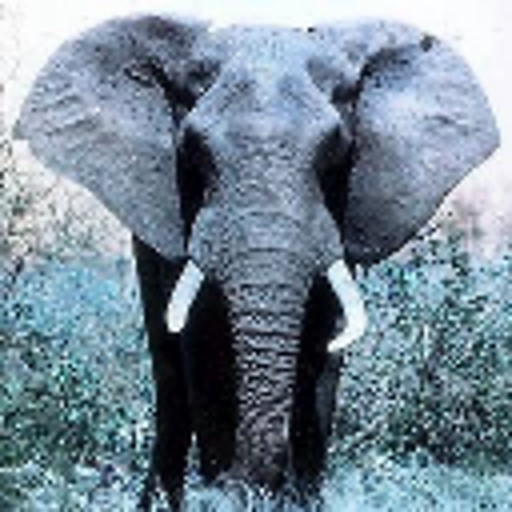

The class: ->	elephant
Prediction ->	elephant

	>>> 100.00% elephant --- 0.00% cow --- 0.00% squirrel --- 0.00% sheep --- 0.00% butterfly <<<





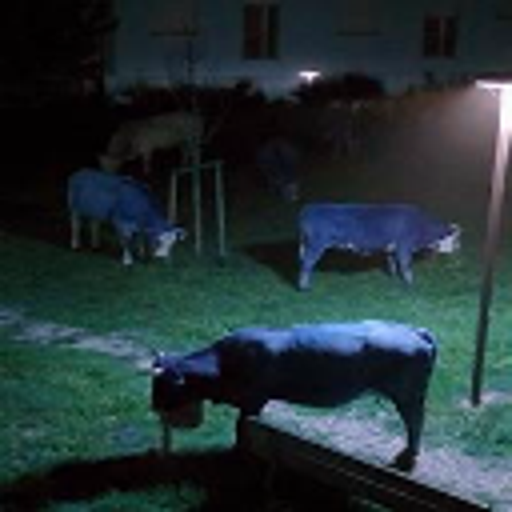

The class: ->	cow
Prediction ->	cow

	>>> 1.98% elephant --- 96.98% cow --- 0.97% squirrel --- 0.00% sheep --- 0.07% butterfly <<<





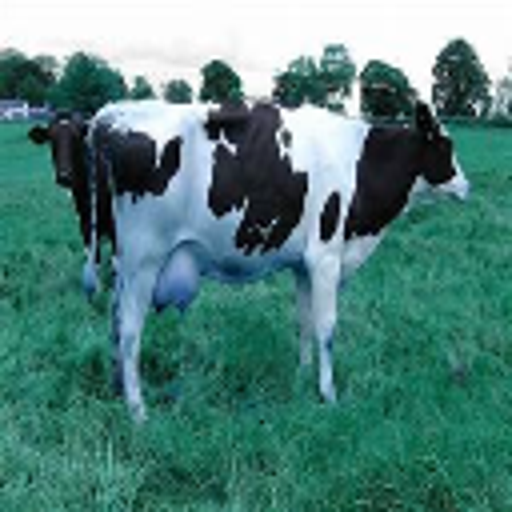

The class: ->	cow
Prediction ->	cow

	>>> 0.00% elephant --- 100.00% cow --- 0.00% squirrel --- 0.00% sheep --- 0.00% butterfly <<<





In [32]:
for i in range(3):
    idx = np.random.randint(0, len(X_test))
    img = X_test[idx]
    ani_class = y_test[idx]
    predict =  model.predict(np.array([img]), verbose=0)[0]
    pred_class = (predict/max(predict)).astype(int)
    
    if ani_class == 0:
        the_class = 'elephant'
    elif ani_class == 1:
        the_class = 'cow'
    elif ani_class == 2:
        the_class = 'squirrel'
    elif ani_class == 3:
        the_class = 'sheep'
    else:
        the_class = 'butterfly'
    
    pred_class = 'elephant' if pred_class[0] else 'cow' if pred_class[1] else 'squirrel' if pred_class[2] else 'sheep' if pred_class[3] else 'butterfly'

    array = (img * 255).astype(np.uint8).reshape((128, 128, 3))
    display(Image.fromarray(array).resize((512, 512)))
    print(f'The class: ->\t{the_class}\nPrediction ->\t{pred_class}\n\n\t>>> {100*predict[0]:.2f}% elephant --- {100*predict[1]:.2f}% cow --- {100*predict[2]:.2f}% squirrel --- {100*predict[3]:.2f}% sheep --- {100*predict[4]:.2f}% butterfly <<<\n\n\n')


In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import chardet
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import keras
import numpy as np
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, Embedding, LSTM
import matplotlib.pyplot as plt

In [8]:
ds = pd.read_csv('spotify-2023.csv', encoding='latin-1')
ds.keys()

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [18]:
with open('spotify-2023.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
ds = pd.read_csv('spotify-2023.csv', encoding=result['encoding'])
ds = ds.drop(columns=['artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis = 1)
ds = ds.rename(columns={"track_name":"track", "in_spotify_charts":"chart"})

cols_to_check = ['track','chart'] #text and label
ds[cols_to_check] = ds[cols_to_check].replace({'½':''}, regex=True)
ds[cols_to_check] = ds[cols_to_check].replace({'ï':''}, regex=True)
ds[cols_to_check] = ds[cols_to_check].replace({'¿':''}, regex=True)
ds.loc[ds["chart"] < 10, "chart"] = 1 #very popular
ds.loc[ds["chart"] >= 10, "chart"] = 0 #not that popular
ds.head()

,track,chart
0,Seven (feat. Latto) (Explicit Ver.),0
1,LALA,0
2,vampire,0
3,Cruel Summer,0
4,WHERE SHE GOES,0


In [23]:
X = ds['track']
y = ds['chart']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [26]:
token = Tokenizer(lower=False)
token.fit_on_texts(X_train)
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

array = []
for i in X_train:
    array.append(len(i))
maxlen = int(np.ceil(np.mean(array))) # вирівнюємо довжину

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
total_words = len(token.word_index) + 1

In [38]:
model = keras.Sequential()
model.add(Embedding(total_words, 32, input_length= maxlen))
model.add(LSTM(10, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
lol = model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
24/24 [==============================] - 3s 4ms/step - loss: 0.6876 - accuracy: 0.6483
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.6706
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.6706
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6076 - accuracy: 0.6706
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.6745
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.6929
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.7493
Epoch 8/50
24/24 [==============================] - 0s 3ms/step - loss: 0.3556 - accuracy: 0.8294
Epoch 9/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2991 - accuracy: 0.9121
Epoch 10/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.9501
Epoch 11/50
24/24 [

In [40]:
results = model.evaluate(X_train, y_train, verbose=0)
print('Losses:', results[0])
print('Accuracy:', results[1])

Losses: 0.011279438622295856
Accuracy: 0.9947506785392761


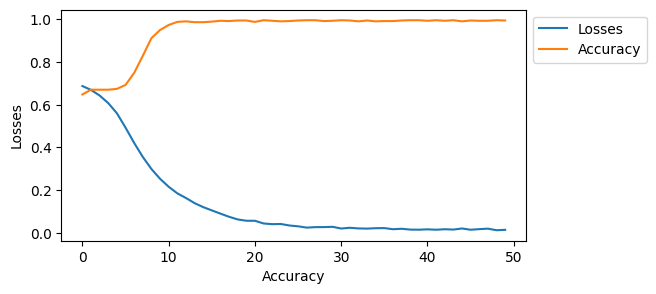

In [42]:
plt.figure(figsize=(6,3))
plt.plot(lol.history['loss'])
plt.plot(lol.history['accuracy'])
plt.ylabel('Losses')
plt.xlabel('Accuracy')
plt.legend(['Losses', 'Accuracy'], bbox_to_anchor = (1, 1))
plt.show()